You can upload files directly to the Colab environment. In the left sidebar, click the folder icon to open the file browser. Then, click the upload icon (an arrow pointing up) and select your JSON file.

Here's where you can find it:

<div align="center">
<img src="https://raw.githubusercontent.com/google/colabtools/master/notebooks/images/drive_browse.gif" height="200px">
</div>

In [38]:
import pandas as pd

wallet_features = []

for wallet, txs in wallets.items():
    deposits = [t for t in txs if t.get('action', '').lower() == 'deposit']
    borrows = [t for t in txs if t.get('action', '').lower() == 'borrow']
    repays = [t for t in txs if t.get('action', '').lower() == 'repay']
    liquidations = [t for t in txs if t.get('action', '').lower() == 'liquidationcall']

    num_deposits = len(deposits)
    num_borrows = len(borrows)
    num_repayments = len(repays)
    num_liquidations = len(liquidations)
    total_tx = len(txs)

    repay_borrow_ratio = num_repayments / num_borrows if num_borrows > 0 else 0
    borrow_deposit_ratio = num_borrows / num_deposits if num_deposits > 0 else 0

    wallet_features.append({
        'wallet': wallet,
        'num_transactions': total_tx,
        'num_deposits': num_deposits,
        'num_borrows': num_borrows,
        'num_repayments': num_repayments,
        'num_liquidations': num_liquidations,
        'repayment_to_borrow_ratio': repay_borrow_ratio,
        'borrow_to_deposit_ratio': borrow_deposit_ratio
    })

df_features = pd.DataFrame(wallet_features)
df_features.head()


""


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

In [39]:
wallets = defaultdict(list)

for tx in data:
    wallet = tx.get('user_address')  # ✅ use actual key here
    if wallet:
        wallets[wallet].append(tx)

print(f"Total unique wallets: {len(wallets)}")


Total unique wallets: 0


In [40]:
records = []
for txn in data:  # Iterate directly over the list
    # Assuming the wallet key is 'userWallet' based on the sample transaction printed earlier
    wallet = txn.get('userWallet')
    if wallet: # Only process if wallet is found
        txn['wallet'] = wallet
        records.append(txn)

df = pd.DataFrame(records)
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')  # Optional: convert to readable datetime
display(df.head()) # Use display for better formatting

,_id,userWallet,network,protocol,txHash,logId,timestamp,blockNumber,action,actionData,__v,createdAt,updatedAt,wallet
0,{'$oid': '681d38fed63812d4655f571a'},0x00000000001accfa9cef68cf5371a23025b6d4b6,polygon,aave_v2,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,2021-08-17 05:29:26,1629178166,deposit,"{'type': 'Deposit', 'amount': '2000000000', 'a...",0,{'$date': '2025-05-08T23:06:39.465Z'},{'$date': '2025-05-08T23:06:39.465Z'},0x00000000001accfa9cef68cf5371a23025b6d4b6
1,{'$oid': '681aa70dd6df53021cc6f3c0'},0x000000000051d07a4fb3bd10121a343d85818da6,polygon,aave_v2,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...,2021-05-20 15:36:53,1621525013,deposit,"{'type': 'Deposit', 'amount': '145000000000000...",0,{'$date': '2025-05-07T00:19:26.159Z'},{'$date': '2025-05-07T00:19:26.159Z'},0x000000000051d07a4fb3bd10121a343d85818da6
2,{'$oid': '681d04c2d63812d4654c733e'},0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...,2021-07-24 09:28:33,1627118913,deposit,"{'type': 'Deposit', 'amount': '100000000000000...",0,{'$date': '2025-05-08T19:23:47.877Z'},{'$date': '2025-05-08T19:23:47.877Z'},0x000000000096026fb41fc39f9875d164bd82e2dc
3,{'$oid': '681d133bd63812d46551b6ef'},0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...,2021-07-31 23:15:18,1627773318,deposit,"{'type': 'Deposit', 'amount': '400000000000000...",0,{'$date': '2025-05-08T20:25:33.141Z'},{'$date': '2025-05-08T20:25:33.141Z'},0x000000000096026fb41fc39f9875d164bd82e2dc
4,{'$oid': '681899e4ba49fc91cf2f4454'},0x0000000000e189dd664b9ab08a33c4839953852c,polygon,aave_v2,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...,2021-04-19 15:25:07,1618845907,redeemunderlying,"{'type': 'RedeemUnderlying', 'amount': '501548...",0,{'$date': '2025-05-05T10:58:45.934Z'},{'$date': '2025-05-05T10:58:45.934Z'},0x0000000000e189dd664b9ab08a33c4839953852c


In [41]:
features = []

for wallet, group in df.groupby('wallet'):
    f = {'wallet': wallet}
    f['num_txns'] = len(group)
    f['active_days'] = (group['timestamp'].max() - group['timestamp'].min()).days + 1
    # Convert 'amount' to numeric, coercing errors to NaN, then fill NaN with 0
    group['amount_numeric'] = pd.to_numeric(group['actionData'].apply(lambda x: x.get('amount')), errors='coerce').fillna(0)

    f['deposit_sum'] = group[group['action'] == 'deposit']['amount_numeric'].sum()
    f['borrow_sum'] = group[group['action'] == 'borrow']['amount_numeric'].sum()
    f['repay_sum'] = group[group['action'] == 'repay']['amount_numeric'].sum()
    f['redeem_sum'] = group[group['action'] == 'redeemunderlying']['amount_numeric'].sum()
    f['num_liquidations'] = len(group[group['action'] == 'liquidationcall'])

    # Calculate ratios, handling division by zero
    f['borrow_repay_ratio'] = f['repay_sum'] / f['borrow_sum'] if f['borrow_sum'] > 0 else 0

    features.append(f)

features_df = pd.DataFrame(features)
features_df.fillna(0, inplace=True)
display(features_df.head())

,wallet,num_txns,active_days,deposit_sum,borrow_sum,repay_sum,redeem_sum,num_liquidations,borrow_repay_ratio
0,0x00000000001accfa9cef68cf5371a23025b6d4b6,1,1,2000000000,0,0,0,0,0.000000e+00
1,0x000000000051d07a4fb3bd10121a343d85818da6,1,1,145000000000000000000.0,0.0,0.0,0.0,0,0.000000e+00
2,0x000000000096026fb41fc39f9875d164bd82e2dc,2,8,5000000000000000,0,0,0,0,0.000000e+00
3,0x0000000000e189dd664b9ab08a33c4839953852c,17,130,0,0,0,4835297129866918825,0,0.000000e+00
4,0x0000000002032370b971dabd36d72f3e5a7bf1ee,399,133,94593658147077101715456.0,39460000000070001885184.0,70024572850.0,39465558796611690168320.0,0,1.774571e-12


In [42]:
def score_wallet(row):
    score = 0
    score += min(row['deposit_sum'], 10000) * 0.01
    score += row['borrow_repay_ratio'] * 200
    score -= row['num_liquidations'] * 100
    score += min(row['active_days'], 365) * 0.5
    score = max(0, min(1000, score))  # Clamp between 0 and 1000
    return round(score)

features_df['credit_score'] = features_df.apply(score_wallet, axis=1)
features_df[['wallet', 'credit_score']].head()


,wallet,credit_score
0,0x00000000001accfa9cef68cf5371a23025b6d4b6,100
1,0x000000000051d07a4fb3bd10121a343d85818da6,100
2,0x000000000096026fb41fc39f9875d164bd82e2dc,104
3,0x0000000000e189dd664b9ab08a33c4839953852c,65
4,0x0000000002032370b971dabd36d72f3e5a7bf1ee,167


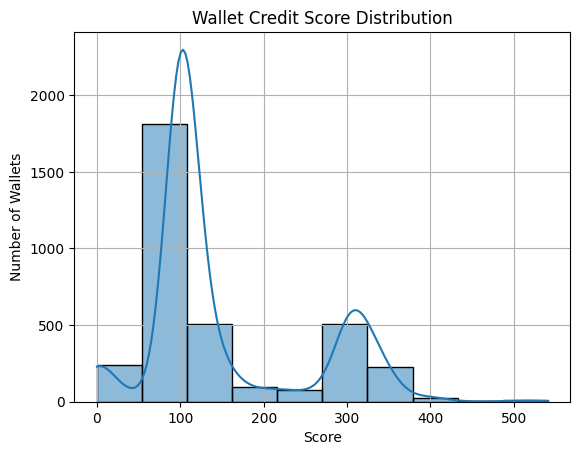

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(features_df['credit_score'], bins=10, kde=True)
plt.title("Wallet Credit Score Distribution")
plt.xlabel("Score")
plt.ylabel("Number of Wallets")
plt.grid()
plt.show()


In [44]:
features_df.to_csv('wallet_credit_scores.csv', index=False)


In [45]:
from google.colab import files
files.download('wallet_credit_scores.csv')

